# News Mood

### Top 3 Findings
1. From the bar chart, CNN & NY Times have negative sentiment analysis where as BBC, CBS & FoxNews trend positively.
2. From the scatter plot, CBS & CNN appear to deviate the furthest from the polarity of 0.
3. From the scatter plot, both CBS and BBC appear to go as negative as -0.6 polarity. However, the other three news medias (FoxNews, NY Times, CNN) are more willing to come as negative with a -1.0 polarity. 
4. From the scatter plot, the three news medias (FoxNews, NY Times, CNN) tend to go as positive as 0.8 polarity but nothing further. 



In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "oHxUu6PpGVrXi4BYprg01acJA"
consumer_secret = "fJUaDMAs00v1dYMOxZTfL1KNfDP7lMwrNZO2MvjtEjG70jSI98"
access_token = "46282375-hL00umBEQWySD97FQ2sPgQMIMcTJiBObsytb7p7sd"
access_token_secret = "c3rZM2MgH0cmizVSZjrbBdhfjwIeLRO1AT4YXi1KNX4cW"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User Account
target_users = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

# Number of pages pulled 
sentiments_DF = pd.DataFrame()
sentiments_dict = {}
sentiments_means = {}
for target_user in target_users:
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    sentiments = []
    sentiments_mean = []
    pages = 5
    i=1

    # Counter
    counter = 1
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1,pages+1):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, page = x)

        # Loop through all tweets
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            # Add sentiments for each tweet into an array
            sentiments.append({"Account":target_user,
                               "Text": tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": tweets_ago})

            # Add to counter 
            counter = counter + 1
    sentiments_mean.append({"Account":target_user,
                            "Mean Compound":np.mean(compound_list)})

    sentiments_dict[target_user] = pd.DataFrame.from_dict(sentiments)
    sentiments_dict[target_user]
    sentiments_means[target_user] = pd.DataFrame.from_dict(sentiments_mean)
    sentiments_means[target_user]
    
    i += 1
    # Counter resets
    counter = 1

In [3]:
mean_DF = pd.concat(sentiments_means,join_axes=None, ignore_index=True,keys=None, levels=None, names=None, verify_integrity=False)
mean_DF

,Account,Mean Compound
0,@BBC,0.194834
1,@CBS,0.367527
2,@CNN,-0.081853
3,@FoxNews,0.026522
4,@nytimes,-0.065368


In [4]:
sentiments_DF = pd.concat(sentiments_dict,join_axes=None, ignore_index=True,keys=None, levels=None, names=None, verify_integrity=False)
sentiments_DF.head()

,Account,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
0,@BBC,0.0000,Thu Dec 14 14:00:08 +0000 2017,1.000,0.0,0.000,🎞🎵🎨 Gospel singer and civil rights activist @M...,1
1,@BBC,0.0000,Thu Dec 14 13:30:06 +0000 2017,1.000,0.0,0.000,"🎄 @LiamPayne, @ddlovato &amp; @Camila_Cabello ...",2
2,@BBC,0.1027,Thu Dec 14 13:03:04 +0000 2017,0.935,0.0,0.065,❄️⛄️ How cold can it get at work before you ca...,3
3,@BBC,0.0000,Thu Dec 14 12:46:06 +0000 2017,1.000,0.0,0.000,RT @BBCNewsround: What do the @UKRobotWars hou...,4
4,@BBC,0.4215,Thu Dec 14 12:45:09 +0000 2017,0.859,0.0,0.141,RT @BBC6Music: What was your favourite album o...,5


In [5]:
sentiments_DF.to_csv("News_Mood.csv")

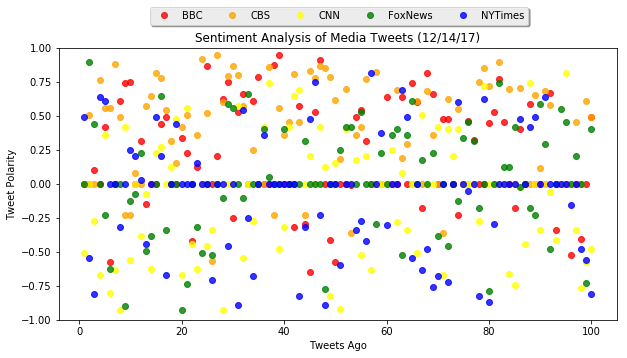

In [50]:
# Create plot
accounts = ["BBC", "CBS", "CNN", "FoxNews", "NYTimes"]
colors = ["red", "orange", "yellow", "green", "blue"]
ax = plt.subplot(111)
y_pos = np.arange(len(accounts))

for i, j in zip(target_users, colors):
    ax.plot(sentiments_dict[i]["Tweets Ago"],
            sentiments_dict[i]["Compound"], marker="o", 
            color = j, linewidth = 0.5, linestyle = 'None',
            alpha=0.8)
        

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
ax.legend(accounts, bbox_to_anchor=(0.85, 1.17),
          ncol=5, fancybox=True, shadow=True)
plt.ylim( ymin = -1, ymax = 1)
figure = plt.gcf()
figure.set_size_inches(10, 5)
plt.savefig("polarity-scatter-plot.png")
plt.show()

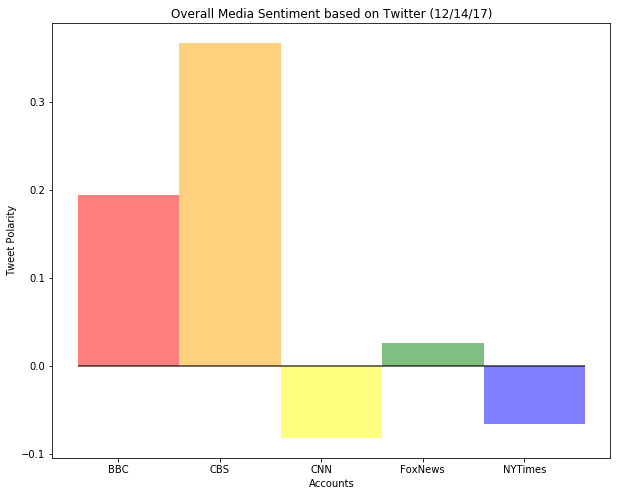

In [52]:
y_pos = np.arange(len(accounts))
performance = mean_DF["Mean Compound"]

plt.bar(y_pos, performance, align='edge', alpha=0.5, color = colors, width = 1)
tick_locations = [value+0.4 for value in y_pos]
plt.xticks(tick_locations, accounts)
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Accounts")
plt.hlines(0,0,5, alpha=0.75)
figure = plt.gcf()
figure.set_size_inches(10, 8)
plt.savefig("polarity-bar-plot.png")
plt.show()
